# Part 2: Naive Bayes, KNN, and Decision Tree
## Objective:
* Predict whether a user purchases a product based on their age and
estimated salary.
* Apply Naive Bayes, KNN, and Decision Tree classifiers.

**Importing the Libraries**

In [12]:
# Importing libraries for data manipulation, numerical operations, plotting, and ML.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Enabling Google Drive access for Kaggle downloaded file.
from google.colab import drive

# Importing Scikit-learn modules for model building and evaluation.
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Setting up a random seed to ensure consistant data splits and results across multiple runs.
np.random.seed(42)

# Setting up for consistent style of plots
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully.")

Libraries imported successfully.


**Data Loading and Sanity Check**

Mounted at /content/drive
Google Drive mounted successfully.

Attempting to load dataset from Google Drive: /content/drive/MyDrive/Social_Network_Ads.csv
Dataset loaded successfully from Google Drive.

Dataset columns standardized:
Index(['user_id', 'gender', 'age', 'estimatedsalary', 'purchased'], dtype='object')

First 5 rows of the dataset:
    user_id  gender  age  estimatedsalary  purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Dataset shape: (400, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          400 non-null    int64 
 1   gender           400 non-null    object
 2   age    

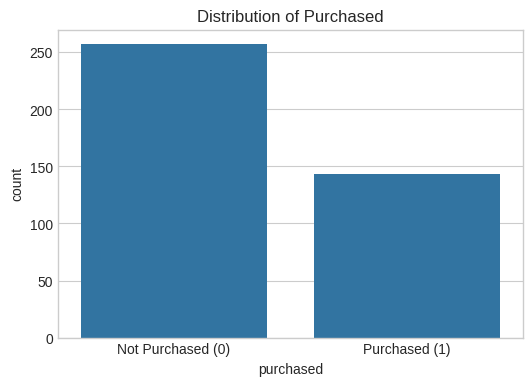


Visualizing relationship between features (Age, EstimatedSalary) and target...


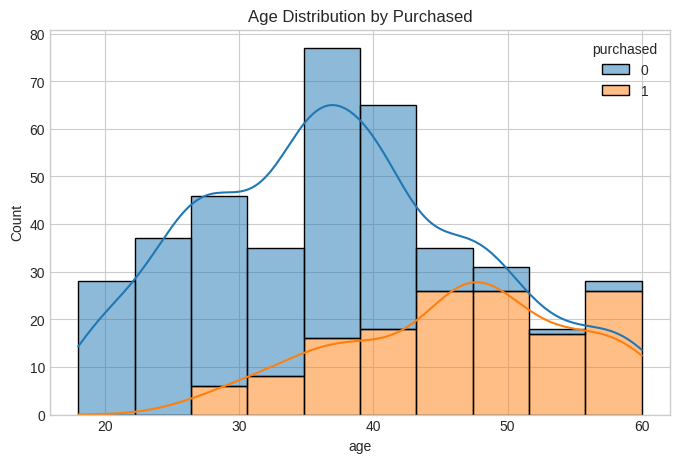

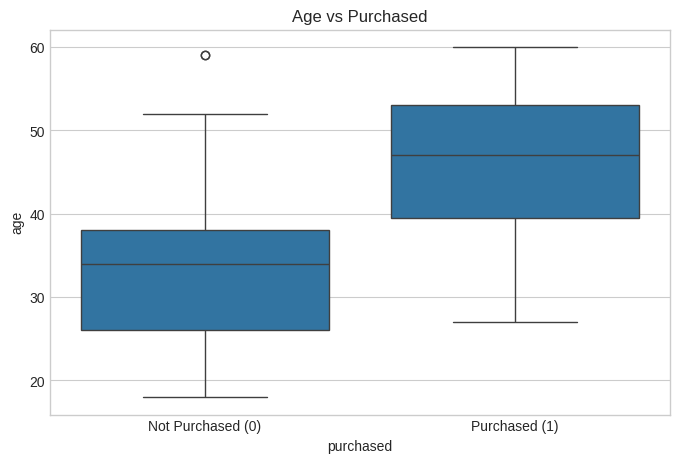

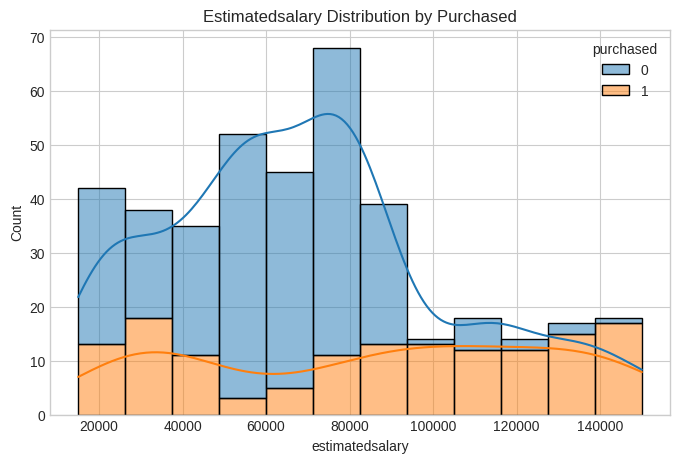

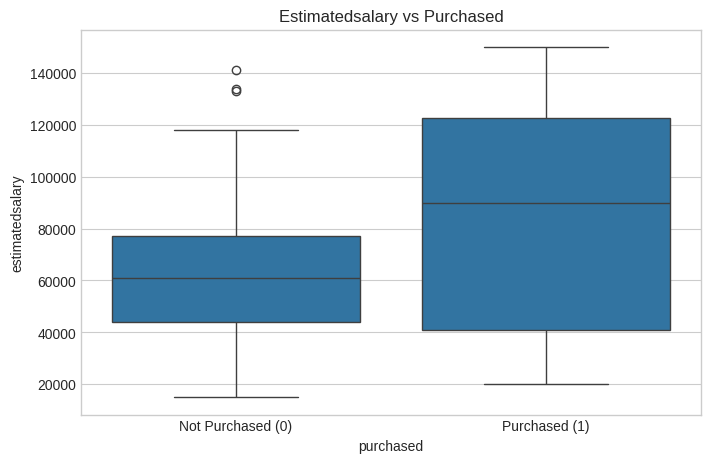

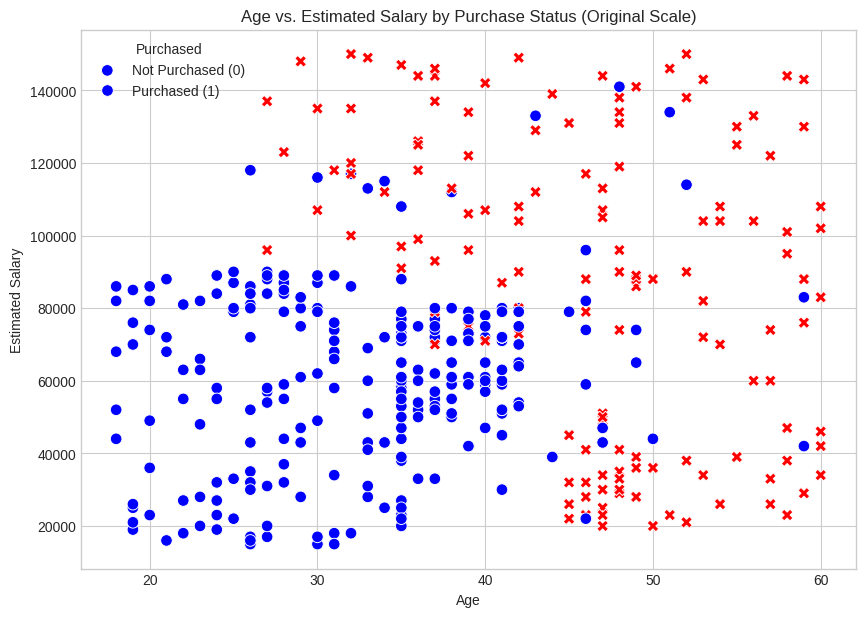

----------------------------------------------------------------------------------------------------


In [13]:
# Loading the dataset through downloded Kaggle (.csv) file mounted to google drive.
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted successfully.")
    file_path_social_ads = '/content/drive/MyDrive/Social_Network_Ads.csv'
    print(f"\nAttempting to load dataset from Google Drive: {file_path_social_ads}")
    df_social_ads = pd.read_csv(file_path_social_ads)
    print("Dataset loaded successfully from Google Drive.")

    # Standardizing the column names
    df_social_ads.columns = [col.replace(' ', '_').lower() for col in df_social_ads.columns]
    print("\nDataset columns standardized:")
    print(df_social_ads.columns)
    print("\nFirst 5 rows of the dataset:")
    print(df_social_ads.head())
    print(f"\nDataset shape: {df_social_ads.shape}")
    print("\nDataset info:")
    df_social_ads.info()

except FileNotFoundError:
    print(f"\nError: File not found at the specified path in Google Drive: {file_path_social_ads}")
    print("Please ensure 'Social_Network_Ads.csv' is in your Google Drive at the specified path.")
except Exception as e:
    print(f"An error occurred during Google Drive mount or file loading: {e}")

if df_social_ads.empty:
    print("\nCritical error: Could not load dataset. Subsequent cells may fail.")
print("-" * 100)
if df_social_ads.empty:
    print("\nCritical error: Could not load dataset for Part 2. Subsequent cells may fail.")
else:
    # Defining the target variable for classification
    target_variable_clf = 'purchased'
    print(f"Target variable for classification: '{target_variable_clf}'")
    print(f"Unique values in target variable: {df_social_ads[target_variable_clf].unique()}")
    print(f"Value counts for target variable:\n{df_social_ads[target_variable_clf].value_counts(normalize=True)}")

    # Dropping 'user_id' and 'gender' as they are not used as features for prediction
    columns_to_drop = []
    if 'user_id' in df_social_ads.columns:
        columns_to_drop.append('user_id')
    if 'gender' in df_social_ads.columns: # Gender is not a feature for prediction as per objective
        columns_to_drop.append('gender')

    if columns_to_drop:
        df_social_ads_processed = df_social_ads.drop(columns=columns_to_drop, axis=1).copy() # Working on a copy as advised in last assignment
        print(f"\nColumns dropped: {columns_to_drop}")
    else:
        df_social_ads_processed = df_social_ads.copy()


    # Checking for missing values in the processed dataframe
    print("\nMissing values check (post-dropping columns):")
    missing_values_clf = df_social_ads_processed.isnull().sum()
    if missing_values_clf.sum() == 0:
        print("No missing values found in the dataset.")
    else:
        print(f"Found {missing_values_clf.sum()} missing values. Columns with missing values:\n{missing_values_clf[missing_values_clf > 0]}")

    # Defining the feature columns (Age, EstimatedSalary)
    feature_cols_clf = ['age', 'estimatedsalary']
    print(f"\nFeatures selected for prediction: {feature_cols_clf}")

    # Separating features and target from the processed dataframe
    y_clf = df_social_ads_processed[target_variable_clf]
    X_raw_clf = df_social_ads_processed[feature_cols_clf] # Raw features before scaling

    # Standardization as part of Feature Engineering
    scaler = StandardScaler()
    X_scaled_clf_array = scaler.fit_transform(X_raw_clf)
    X_clf = pd.DataFrame(X_scaled_clf_array, columns=X_raw_clf.columns) # X_clf is now the scaled features

    print(f"Features (X_clf) selected and scaled: {X_clf.columns.tolist()}")
    print("\nFirst 5 rows of scaled features (X_clf):")
    print(X_clf.head())

    # Enabling distribution of the target variable 'purchased'
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target_variable_clf, data=df_social_ads_processed) # Use processed df for consistency
    plt.title(f'Distribution of {target_variable_clf.title()}')
    plt.xticks(ticks=[0, 1], labels=['Not Purchased (0)', 'Purchased (1)'])
    plt.show()

    # Relationship of numerical features (Age, EstimatedSalary) with the target
    print("\nVisualizing relationship between features (Age, EstimatedSalary) and target...")
    for col in feature_cols_clf: # These are original column names
        plt.figure(figsize=(8, 5))
        sns.histplot(data=df_social_ads_processed, x=col, hue=target_variable_clf, kde=True, multiple="stack")
        plt.title(f'{col.title()} Distribution by {target_variable_clf.title()}')
        plt.show()

        plt.figure(figsize=(8, 5))
        sns.boxplot(x=target_variable_clf, y=col, data=df_social_ads_processed)
        plt.title(f'{col.title()} vs {target_variable_clf.title()}')
        plt.xticks(ticks=[0,1], labels=['Not Purchased (0)', 'Purchased (1)'])
        plt.show()

    # Scatter plot of Age vs EstimatedSalary colored by Purchased
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_social_ads_processed, x='age', y='estimatedsalary', hue=target_variable_clf, palette={0: 'blue', 1: 'red'}, style=target_variable_clf, s=70)
    plt.title('Age vs. Estimated Salary by Purchase Status (Original Scale)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend(title='Purchased', labels=['Not Purchased (0)', 'Purchased (1)'])
    plt.grid(True)
    plt.show()

print("-" * 100)

**Model Building**

In [14]:
# Initializing dictionaries to store models and their accuracies
models_clf = {}
train_accuracies_clf = {}
test_accuracies_clf = {}

# Checking if X_clf (scaled) and y_clf are available from the previous cell
if 'X_clf' in globals() and 'y_clf' in globals() and not X_clf.empty and not y_clf.empty:
    # --- Section 6: Train/Test Split & Model Training ---
    print("\n--- Sub-section: Train/Test Split ---")
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
        X_clf, y_clf, test_size=0.25, random_state=42, stratify=y_clf # 75/25 split
    )
    print(f"Data split into training (75%) and testing (25%) sets.")
    print(f"Training set shape: X_train_clf: {X_train_clf.shape}, y_train_clf: {y_train_clf.shape}")
    print(f"Test set shape: X_test_clf: {X_test_clf.shape}, y_test_clf: {y_test_clf.shape}")

    # Model 1: Naive Bayes (GaussianNB)
    print("\nBuilding Naive Bayes (GaussianNB) model...")
    nb_model = GaussianNB()
    nb_model.fit(X_train_clf, y_train_clf) # Models are trained on scaled data
    models_clf['Naive Bayes'] = nb_model
    print("Naive Bayes model trained.")

    # Model 2: K-Nearest Neighbors (KNN)
    knn_k_values = [3, 5, 7]
    for k in knn_k_values:
        model_name = f"KNN (k={k})"
        print(f"\nBuilding {model_name} model...")
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train_clf, y_train_clf)
        models_clf[model_name] = knn_model
        print(f"{model_name} model trained.")

    # Model 3: Decision Tree Classifier
    dt_criteria = ['gini', 'entropy']
    for criterion in dt_criteria:
        model_name = f"Decision Tree ({criterion})"
        print(f"\nBuilding {model_name} model...")
        dt_model = DecisionTreeClassifier(criterion=criterion, random_state=42)
        dt_model.fit(X_train_clf, y_train_clf)
        models_clf[model_name] = dt_model
        print(f"{model_name} model trained.")
else:
    print("Skipping Cell 3 (Model Building) due to missing scaled features (X_clf) or target (y_clf) from previouscell/Cell 2.")
print("-" * 100)


--- Sub-section: Train/Test Split ---
Data split into training (75%) and testing (25%) sets.
Training set shape: X_train_clf: (300, 2), y_train_clf: (300,)
Test set shape: X_test_clf: (100, 2), y_test_clf: (100,)

Building Naive Bayes (GaussianNB) model...
Naive Bayes model trained.

Building KNN (k=3) model...
KNN (k=3) model trained.

Building KNN (k=5) model...
KNN (k=5) model trained.

Building KNN (k=7) model...
KNN (k=7) model trained.

Building Decision Tree (gini) model...
Decision Tree (gini) model trained.

Building Decision Tree (entropy) model...
Decision Tree (entropy) model trained.
----------------------------------------------------------------------------------------------------


**Model Evaluation**


Naive Bayes Metrics:
  Training Set:
    Accuracy: 0.887
    Classification Report (Training Set):
                   precision    recall  f1-score   support

Not Purchased (0)      0.899     0.927     0.913       193
    Purchased (1)      0.861     0.813     0.837       107

         accuracy                          0.887       300
        macro avg      0.880     0.870     0.875       300
     weighted avg      0.886     0.887     0.886       300


  Test Set:
    Accuracy: 0.870
    Classification Report (Test Set):
                   precision    recall  f1-score   support

Not Purchased (0)      0.881     0.922     0.901        64
    Purchased (1)      0.848     0.778     0.812        36

         accuracy                          0.870       100
        macro avg      0.865     0.850     0.856       100
     weighted avg      0.869     0.870     0.869       100


  Confusion Matrix (Test Set):


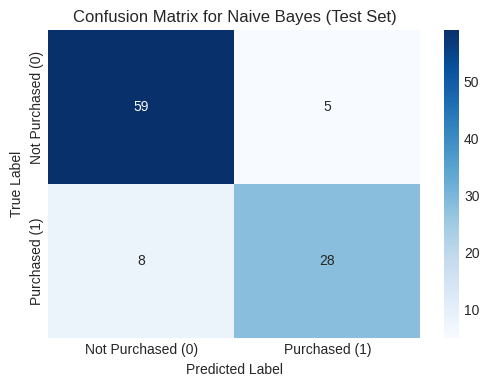


  Decision Boundaries for Naive Bayes (using Test Set points):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


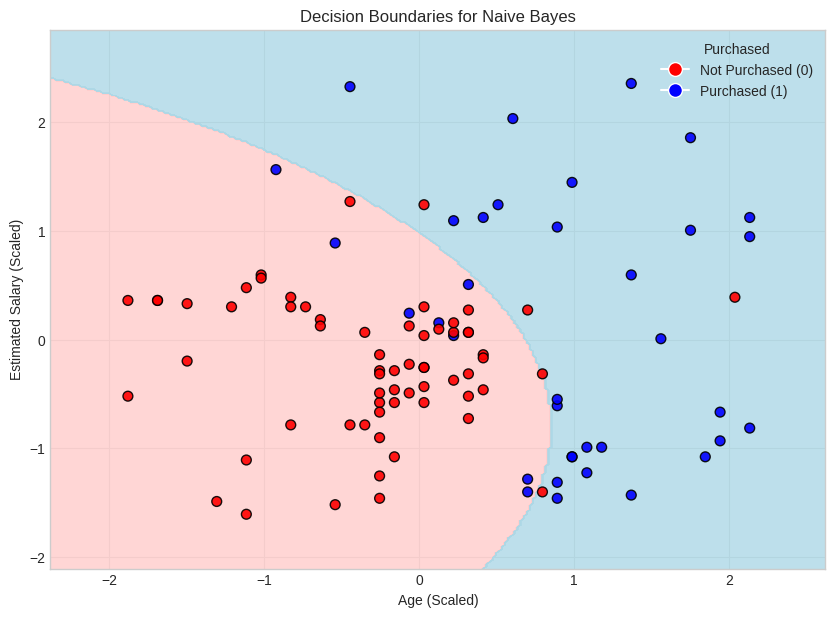


KNN (k=3) Metrics:
  Training Set:
    Accuracy: 0.923
    Classification Report (Training Set):
                   precision    recall  f1-score   support

Not Purchased (0)      0.952     0.927     0.940       193
    Purchased (1)      0.875     0.916     0.895       107

         accuracy                          0.923       300
        macro avg      0.914     0.922     0.917       300
     weighted avg      0.925     0.923     0.924       300


  Test Set:
    Accuracy: 0.900
    Classification Report (Test Set):
                   precision    recall  f1-score   support

Not Purchased (0)      0.897     0.953     0.924        64
    Purchased (1)      0.906     0.806     0.853        36

         accuracy                          0.900       100
        macro avg      0.902     0.879     0.889       100
     weighted avg      0.900     0.900     0.899       100


  Confusion Matrix (Test Set):


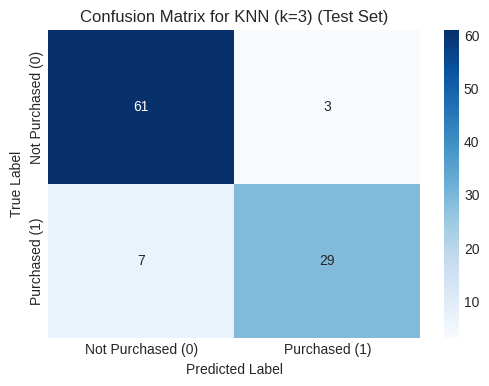


  Decision Boundaries for KNN (k=3) (using Test Set points):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


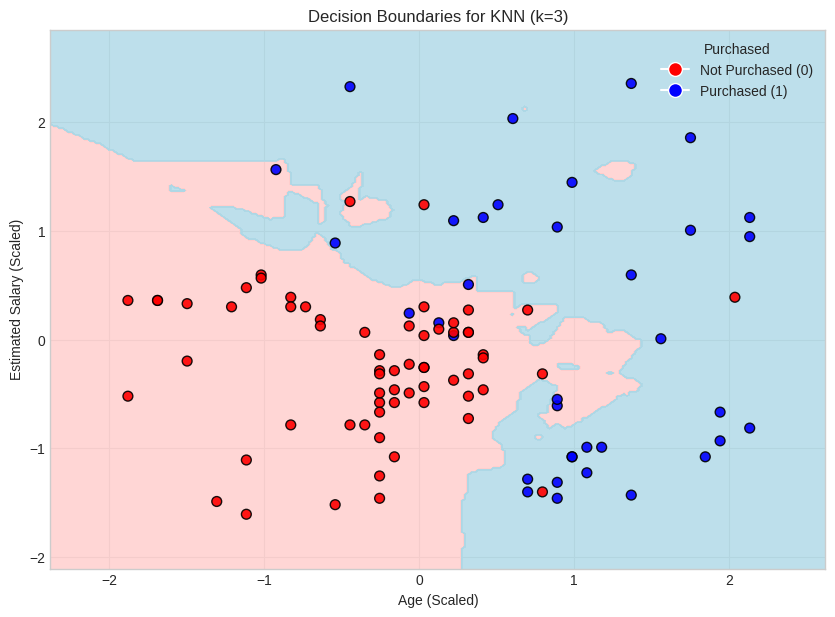


KNN (k=5) Metrics:
  Training Set:
    Accuracy: 0.913
    Classification Report (Training Set):
                   precision    recall  f1-score   support

Not Purchased (0)      0.951     0.912     0.931       193
    Purchased (1)      0.852     0.916     0.883       107

         accuracy                          0.913       300
        macro avg      0.902     0.914     0.907       300
     weighted avg      0.916     0.913     0.914       300


  Test Set:
    Accuracy: 0.910
    Classification Report (Test Set):
                   precision    recall  f1-score   support

Not Purchased (0)      0.923     0.938     0.930        64
    Purchased (1)      0.886     0.861     0.873        36

         accuracy                          0.910       100
        macro avg      0.904     0.899     0.902       100
     weighted avg      0.910     0.910     0.910       100


  Confusion Matrix (Test Set):


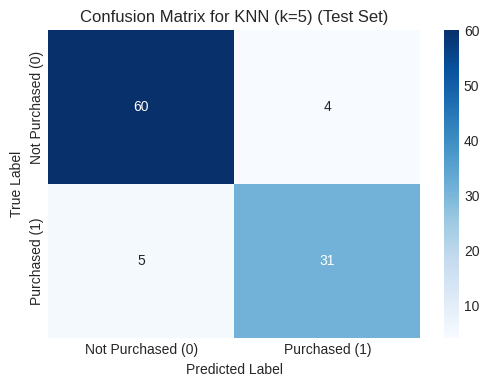


  Decision Boundaries for KNN (k=5) (using Test Set points):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


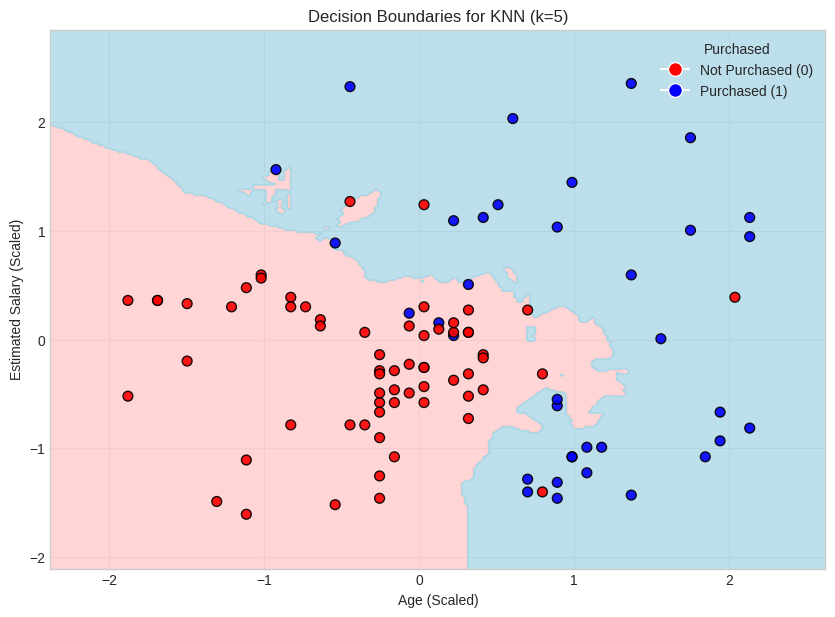


KNN (k=7) Metrics:
  Training Set:
    Accuracy: 0.923
    Classification Report (Training Set):
                   precision    recall  f1-score   support

Not Purchased (0)      0.967     0.912     0.939       193
    Purchased (1)      0.856     0.944     0.898       107

         accuracy                          0.923       300
        macro avg      0.911     0.928     0.918       300
     weighted avg      0.927     0.923     0.924       300


  Test Set:
    Accuracy: 0.920
    Classification Report (Test Set):
                   precision    recall  f1-score   support

Not Purchased (0)      0.938     0.938     0.938        64
    Purchased (1)      0.889     0.889     0.889        36

         accuracy                          0.920       100
        macro avg      0.913     0.913     0.913       100
     weighted avg      0.920     0.920     0.920       100


  Confusion Matrix (Test Set):


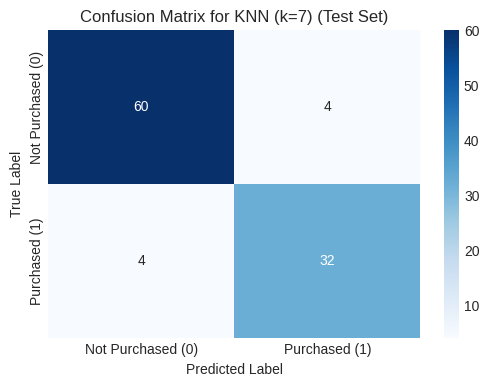


  Decision Boundaries for KNN (k=7) (using Test Set points):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


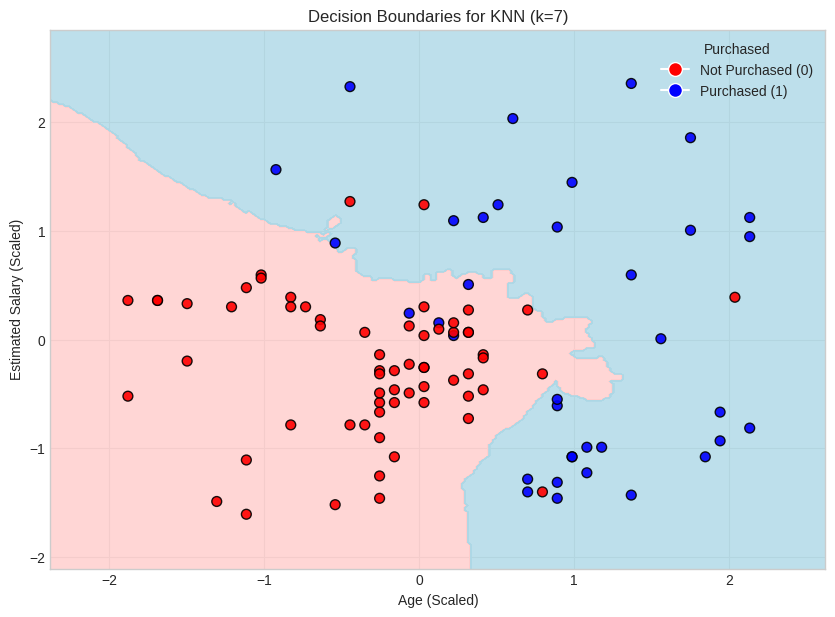


Decision Tree (gini) Metrics:
  Training Set:
    Accuracy: 0.993
    Classification Report (Training Set):
                   precision    recall  f1-score   support

Not Purchased (0)      0.990     1.000     0.995       193
    Purchased (1)      1.000     0.981     0.991       107

         accuracy                          0.993       300
        macro avg      0.995     0.991     0.993       300
     weighted avg      0.993     0.993     0.993       300


  Test Set:
    Accuracy: 0.890
    Classification Report (Test Set):
                   precision    recall  f1-score   support

Not Purchased (0)      0.921     0.906     0.913        64
    Purchased (1)      0.838     0.861     0.849        36

         accuracy                          0.890       100
        macro avg      0.879     0.884     0.881       100
     weighted avg      0.891     0.890     0.890       100


  Confusion Matrix (Test Set):


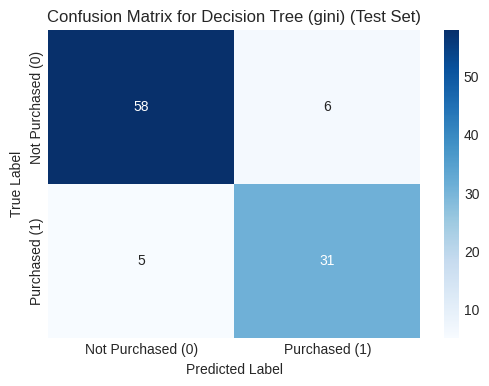


  Decision Boundaries for Decision Tree (gini) (using Test Set points):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


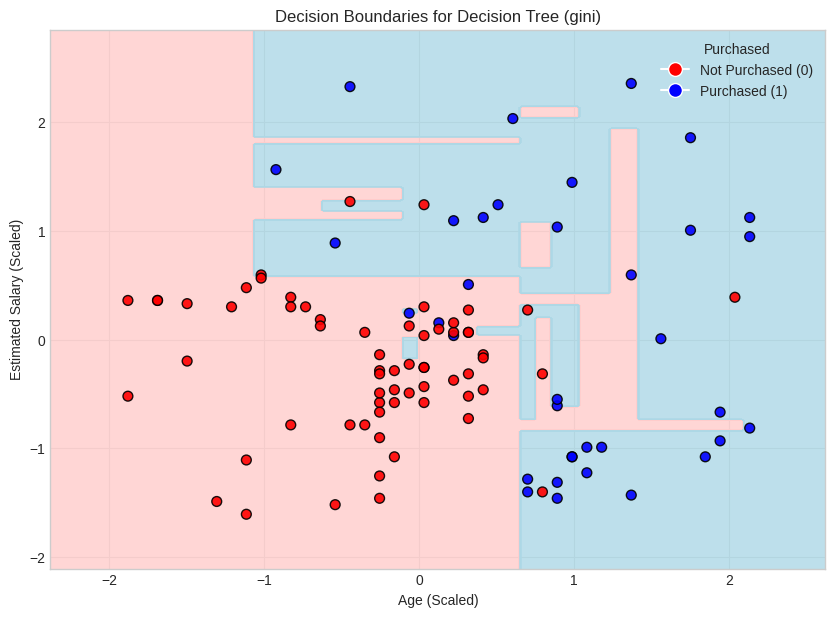


Decision Tree (entropy) Metrics:
  Training Set:
    Accuracy: 0.993
    Classification Report (Training Set):
                   precision    recall  f1-score   support

Not Purchased (0)      0.990     1.000     0.995       193
    Purchased (1)      1.000     0.981     0.991       107

         accuracy                          0.993       300
        macro avg      0.995     0.991     0.993       300
     weighted avg      0.993     0.993     0.993       300


  Test Set:
    Accuracy: 0.900
    Classification Report (Test Set):
                   precision    recall  f1-score   support

Not Purchased (0)      0.935     0.906     0.921        64
    Purchased (1)      0.842     0.889     0.865        36

         accuracy                          0.900       100
        macro avg      0.889     0.898     0.893       100
     weighted avg      0.902     0.900     0.901       100


  Confusion Matrix (Test Set):


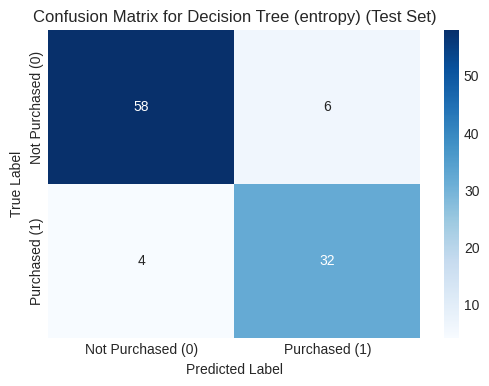


  Decision Boundaries for Decision Tree (entropy) (using Test Set points):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


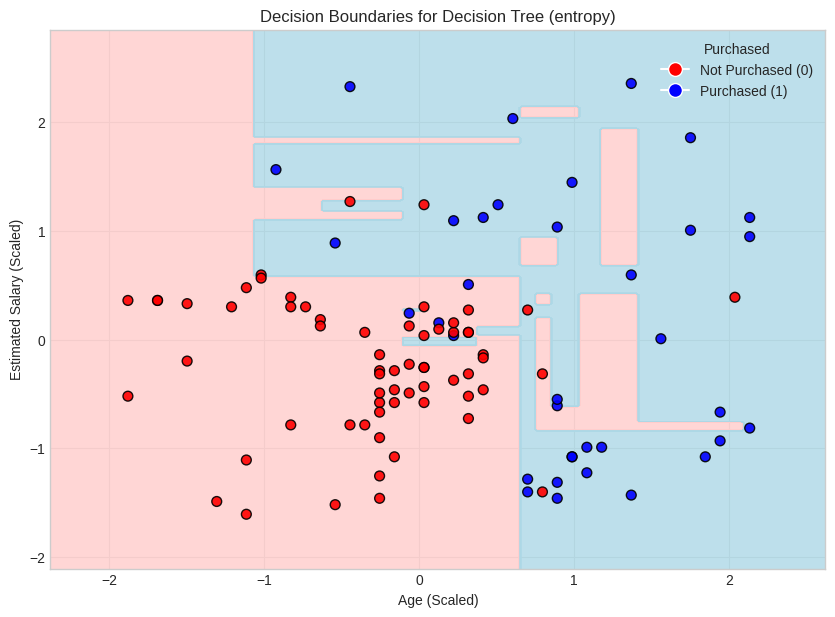


Discussing Overfitting/Underfitting (based on Accuracy scores):

Naive Bayes Analysis:
  Good Generalization: Training Accuracy (0.887) and Test Accuracy (0.870) are close.

KNN (k=3) Analysis:
  Good Generalization: Training Accuracy (0.923) and Test Accuracy (0.900) are close.

KNN (k=5) Analysis:
  Good Generalization: Training Accuracy (0.913) and Test Accuracy (0.910) are close.

KNN (k=7) Analysis:
  Good Generalization: Training Accuracy (0.923) and Test Accuracy (0.920) are close.

Decision Tree (gini) Analysis:
  Potential Overfitting: Training Accuracy (0.993) vs Test Accuracy (0.890).

Decision Tree (entropy) Analysis:
  Good Generalization: Training Accuracy (0.993) and Test Accuracy (0.900) are close.

Summary of Test Set Accuracy for Comparative Discussion:
- Naive Bayes Test Accuracy: 0.870
- KNN (k=3) Test Accuracy: 0.900
- KNN (k=5) Test Accuracy: 0.910
- KNN (k=7) Test Accuracy: 0.920
- Decision Tree (gini) Test Accuracy: 0.890
- Decision Tree (entropy) Test Accuracy

In [15]:
# Building a function to plot decision boundaries.
def plot_decision_boundaries(X, y, model, model_name):
    # X should be the scaled features (e.g., X_test_clf or X_train_clf)
    if isinstance(X, pd.DataFrame):
        X_np = X.to_numpy()
    else:
        X_np = X # Assuming X is already a NumPy array if not a DataFrame

    y_np = y.to_numpy() if isinstance(y, pd.Series) else y

    h = .02  # step size in the mesh
    x_min, x_max = X_np[:, 0].min() - 0.5, X_np[:, 0].max() + 0.5 # Adjusted margin for better plot
    y_min, y_max = X_np[:, 1].min() - 0.5, X_np[:, 1].max() + 0.5 # Adjusted margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    cmap_light = ListedColormap(['#FFCCCB', '#ADD8E6']) # Light red, Light blue
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])  # Red, Blue

    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    feature_names = ['Age (Scaled)', 'Estimated Salary (Scaled)']

    # Plot data points (e.g., test set)
    scatter = plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, cmap=cmap_bold, edgecolor='k', s=50, alpha=0.9)

    handles = [plt.Line2D([0], [0], marker='o', color='w', label='Not Purchased (0)', markersize=10, markerfacecolor=cmap_bold.colors[0]),
               plt.Line2D([0], [0], marker='o', color='w', label='Purchased (1)', markersize=10, markerfacecolor=cmap_bold.colors[1])]
    plt.legend(handles=handles, title="Purchased")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Decision Boundaries for {model_name}")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

# Check if models were trained and data is available from Cell 3 (Model Building)
if 'models_clf' in globals() and models_clf and 'X_train_clf' in globals() and 'y_train_clf' in globals() and 'X_test_clf' in globals() and 'y_test_clf' in globals():
    # Model evaluation for classification
    def print_classification_metrics_detailed(model_name, model, X_train, y_train, X_test, y_test, class_names_map):
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        print(f"\n{model_name} Metrics:")
        print("  Training Set:")
        print(f"    Accuracy: {accuracy_score(y_train, y_pred_train):.3f}")
        # Full classification report for training set
        print("    Classification Report (Training Set):")
        print(classification_report(y_train, y_pred_train, target_names=class_names_map.get('names'), zero_division=0, digits=3))

        print("\n  Test Set:")
        print(f"    Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")
        print("    Classification Report (Test Set):")
        print(classification_report(y_test, y_pred_test, target_names=class_names_map.get('names'), zero_division=0, digits=3))

        print("\n  Confusion Matrix (Test Set):")
        cm = confusion_matrix(y_test, y_pred_test)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_map.get('names'), yticklabels=class_names_map.get('names'))
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix for {model_name} (Test Set)')
        plt.show()

        print(f"\n  Decision Boundaries for {model_name} (using Test Set points):")
        # X_test_clf is already scaled and ready for plotting
        plot_decision_boundaries(X_test_clf, y_test_clf, model, model_name)

        return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

    class_names_map_clf = {'names': ['Not Purchased (0)', 'Purchased (1)']}

    for model_name, model_instance in models_clf.items():
        train_acc, test_acc = print_classification_metrics_detailed(
            model_name, model_instance, X_train_clf, y_train_clf, X_test_clf, y_test_clf, class_names_map_clf
        )
        train_accuracies_clf[model_name] = train_acc
        test_accuracies_clf[model_name] = test_acc

    # Evaluating overfitting/underfitting
    print("\nDiscussing Overfitting/Underfitting (based on Accuracy scores):")
    for model_name in models_clf.keys():
        train_acc = train_accuracies_clf.get(model_name, float('nan')) # Use .get for safety
        test_acc = test_accuracies_clf.get(model_name, float('nan'))
        print(f"\n{model_name} Analysis:")
        if not (np.isnan(train_acc) or np.isnan(test_acc)): # Proceed if accuracies are valid
            if abs(train_acc - test_acc) > 0.1 and train_acc > test_acc:
                print(f"  Potential Overfitting: Training Accuracy ({train_acc:.3f}) vs Test Accuracy ({test_acc:.3f}).")
            elif test_acc < 0.7:
                print(f"  Potential Underfitting: Test Accuracy ({test_acc:.3f}) is relatively low.")
            else:
                print(f"  Good Generalization: Training Accuracy ({train_acc:.3f}) and Test Accuracy ({test_acc:.3f}) are close.")
        else:
            print(f"  Accuracy scores not available for {model_name}.")


    print("\nSummary of Test Set Accuracy for Comparative Discussion:")
    for model_name, acc in test_accuracies_clf.items():
        print(f"- {model_name} Test Accuracy: {acc:.3f}")
    print("(Detailed interpretation and comparison to follow in the Text Cell.)")

else:
    print("Skipping Cell 4 (Model Evaluation) due to missing trained models or data from previous cells.")
print("-" * 100)

### **1-Page Summary** - Performance Comparison of Models

After training and evaluating Gaussian Naive Bayes, K-Nearest Neighbors (with k=3, 5, and 7), and Decision Tree (with Gini and Entropy criteria) classifiers on the Social Network Ads dataset, we can compare their performance in predicting whether a user will purchase a product based on their age and estimated salary.

**Summary of Test Set Accuracies:**
* Naive Bayes (GaussianNB): 0.870
* KNN (k=3): 0.900
* KNN (k=5): 0.910
* **KNN (k=7): 0.920 (Highest Accuracy)**
* Decision Tree (Gini): 0.890
* Decision Tree (Entropy): 0.900

**Performance Analysis:**

1.  **K-Nearest Neighbors (KNN):**
    * The KNN models consistently performed very well, with accuracy generally improving as `k` increased from 3 to 7.
    * **KNN (k=7) achieved the highest test accuracy of 0.920.** It also demonstrated excellent generalization, with a training accuracy of 0.923 being very close to its test accuracy. For the "Purchased (1)" class, it achieved balanced precision (0.889) and recall (0.889) on the test set, resulting in a strong F1-score of 0.889.
    * **KNN (k=5) was also a strong performer with a test accuracy of 0.910.** It showed excellent generalization (Training Acc: 0.913, Test Acc: 0.910) and very good precision (0.886) and recall (0.861) for the "Purchased (1)" class on the test set.
    * KNN (k=3) had a slightly lower test accuracy of 0.900 but still performed robustly, with good generalization (Training Acc: 0.923, Test Acc: 0.900).
    * All KNN variants showed minimal signs of overfitting.

2.  **Decision Tree Classifiers:**
    * Both Decision Tree models (Gini and Entropy) achieved perfect or near-perfect accuracy on the training set (0.993).
    * The **Decision Tree (Entropy)** model performed slightly better on the test set with an accuracy of 0.900, compared to the Gini criterion's 0.890.
    * However, both Decision Tree models exhibited a noticeable drop in accuracy from training to testing (around 0.09-0.10), suggesting a tendency to **overfit** the training data. While their test accuracies are good, this overfitting is a concern for generalization to completely new data compared to the KNN models. For the "Purchased (1)" class, the Entropy model had a precision of 0.842 and recall of 0.889 on the test set.

3.  **Naive Bayes (GaussianNB):**
    * The Naive Bayes model achieved a test accuracy of 0.870.
    * It showed good generalization with training accuracy (0.887) being close to test accuracy.
    * While a respectable performance, it was outperformed by all KNN variants and both Decision Tree variants in terms of raw test accuracy. For the "Purchased (1)" class, its precision was 0.848 and recall was 0.778 on the test set.

**Identifying the Best Performing Model:**

Considering overall test accuracy, generalization ability (minimal overfitting), and balanced performance across precision and recall for the target class ('Purchased'), the **K-Nearest Neighbors (KNN) model with k=7 stands out as the best performing model.**

* It achieved the highest test accuracy (0.920).
* It showed excellent generalization with almost no drop from training to test accuracy.
* Its F1-score for the 'Purchased' class (0.889) was strong and balanced.
* The decision boundary plots (generated in the evaluation cell) would further illustrate how each KNN variant separates the classes. KNN (k=7) likely provides a smoother, more generalized boundary compared to potentially more complex boundaries from the Decision Trees or KNN with smaller `k`.

While the Decision Tree (Entropy) and KNN (k=5 and k=3) also achieved high test accuracies (0.900-0.910), the slightly superior accuracy and excellent generalization of KNN (k=7) make it the most reliable choice among the tested models. Naive Bayes, though robust, did not reach the same level of predictive accuracy as the top KNN models.

**Conclusion:**

For predicting product purchases based on age and estimated salary in this dataset, the **KNN classifier with k=7 is recommended.** It provides the best balance of high accuracy on unseen data and strong generalization capabilities. Further hyperparameter tuning for KNN (e.g., exploring a wider range of `k` or different distance metrics) could potentially yield even better results, but among the tested configurations, KNN (k=7) is the clear winner.